In [478]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [479]:
df=pd.read_csv("/home/usamakhan/Downloads/Churn_Modelling.xls")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [480]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [481]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [482]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [483]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [484]:
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [485]:
x_train ,x_test , y_train , y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
x_train.shape , x_test.shape ,y_train.shape , y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [486]:
scaled=StandardScaler()
x_train_scaled=scaled.fit_transform(x_train)
x_test_scaled=scaled.fit_transform(x_test)
x_train_scaled , x_test_scaled

(array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
         -0.57138416, -1.0862028 ],
        [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
         -0.57138416, -1.0862028 ],
        [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
         -0.57138416, -1.0862028 ],
        ...,
        [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
         -0.57138416,  0.9206384 ],
        [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
         -0.57138416,  0.9206384 ],
        [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
         -0.57138416, -1.0862028 ]]),
 array([[ 0.83007081, -0.0583534 ,  1.76317847, ..., -0.55732934,
         -0.58350885, -1.13620013],
        [-0.06484497,  0.23487975, -1.0115688 , ...,  1.79427124,
         -0.58350885, -1.13620013],
        [-0.3458069 ,  1.7010455 ,  0.72264824, ..., -0.55732934,
         -0.58350885,  0.88012663],
        ...,
        [ 0.8716948 , -0.0583534 , -1.35841221, ..., -

In [487]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, BatchNormalization
from keras.callbacks import EarlyStopping

In [488]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [489]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [490]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [491]:
history = model.fit(x_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/100


/home/usamakhan/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


128/128 [==============================] - 1s 6ms/step - loss: 0.5700 - accuracy: 0.7431 - val_loss: 0.4623 - val_accuracy: 0.8163
Epoch 2/100
128/128 [==============================] - 1s 4ms/step - loss: 0.4620 - accuracy: 0.8081 - val_loss: 0.4257 - val_accuracy: 0.8194
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8136 - val_loss: 0.4138 - val_accuracy: 0.8244
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8178 - val_loss: 0.4076 - val_accuracy: 0.8263
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8203 - val_loss: 0.4017 - val_accuracy: 0.8263
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8231 - val_loss: 0.3967 - val_accuracy: 0.8288
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4128 - accuracy: 0.8245 - val_loss: 0.3923 - val_accuracy: 0.8306
Epoch 8/100

In [492]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [493]:
y_pred = y_pred.argmax(axis=-1)

In [494]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8085

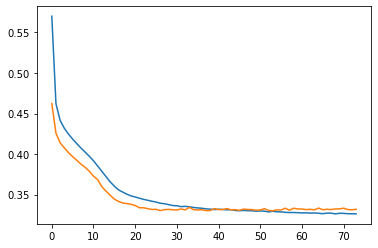

In [495]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

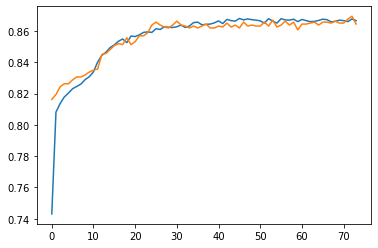

In [496]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Test Accuracy:  0.8085


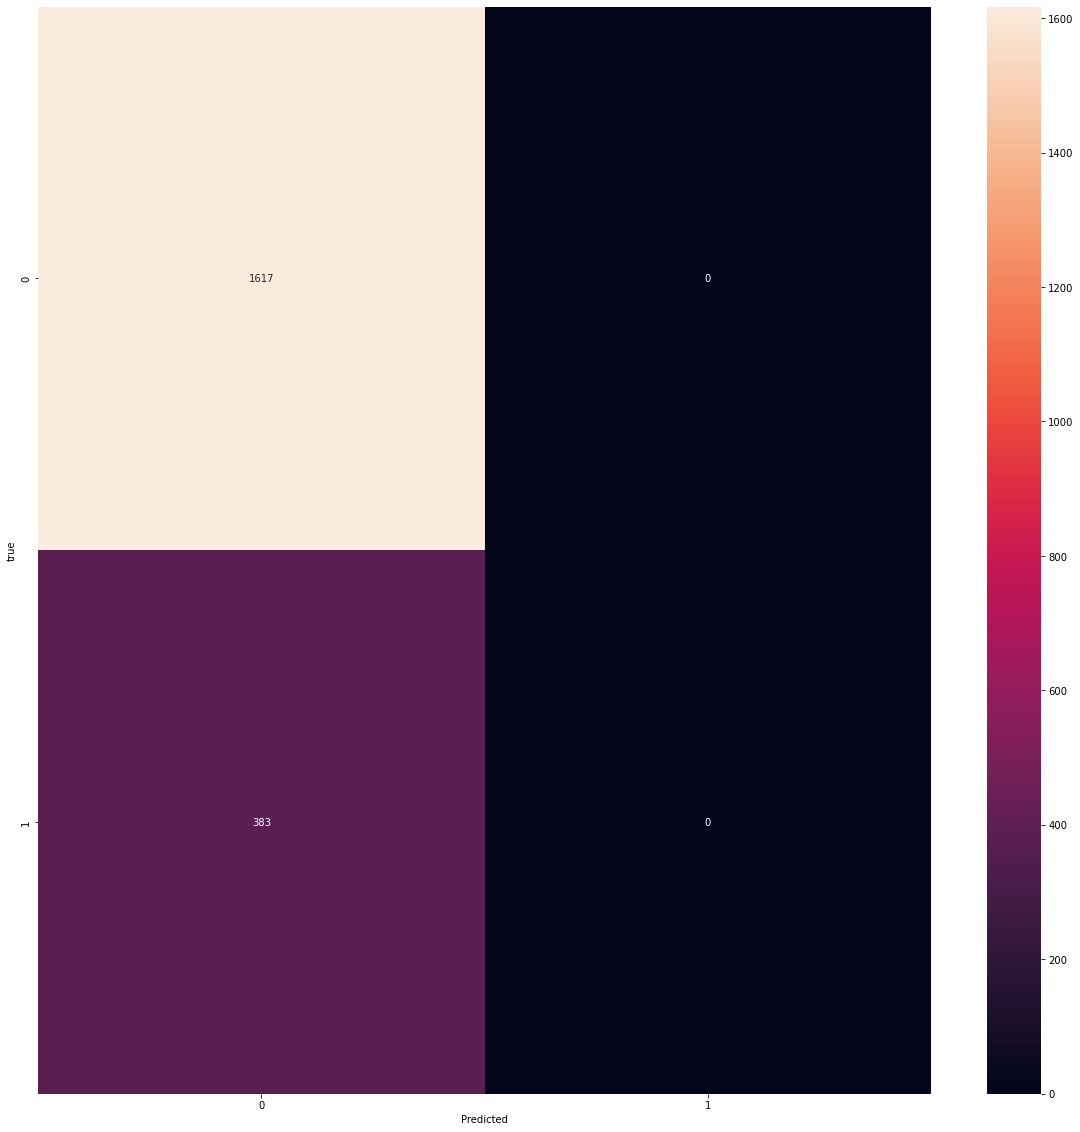

In [500]:
from mlxtend.evaluate import confusion_matrix
import seaborn as sns
test_acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()